# Exercise for PhD students and interested Master students

## Task (A): Helper Function for PCA

A.1 Write down the algorithm of a principal component analysis. Let X denote the matrix of variables and PC(X) be the corresponding matrix of principal components. Use the markdown capability of the ipynb for the tex commands.

A.2 Write a function called GetPCs. It takes a panel of stationary data as input and returns the matrix of eigenvalues (Lambda), the matrix of eigenvectors (E) and the panel of principal components.

Hint: use the numpy.linalg.eig() function to extract eigenvalues and eigenvectors from the covariance matrix of X. 



## Task (B): Testing the Function GetPCs

B.1 Read-in daily return data of Euro Stoxx 50 constituents from the file r_ES50_d_cleaned_realized.csv

B.2 Plot the first three principal components of daily returns of Euro Stoxx 50 constituents. 

B3. How much relative variance does each principal component explain?

B.4 Double check your solution for B.3 by using the built-in function in sklearn. Hint: from sklearn.decomposition import PCA 


## Task (C): Object-oriented Coding

C.1 Write a class called PCA. The class contains its own functions:  

(i)  PerformEigenValueDecomposition(self) which conducts the PCA
(ii) display_cumVarTable(self) which displays the cumulative variance table for principle components
(iii) plotPC(self,threshold) which plots PC1 to PC_threshold
   
C.2 Test that the class PCA produces same results than B.2 and B.3.

## Solution to A.1

$$
\underbrace{X}_{T \times K} = \left[\underbrace{r^{(1)}}_{T \times 1}, ..., r^{(K)} \right] \quad \quad \text{:K time-series of stock returns }
$$

Demean $X$

$$
{X}^{dm} = \left[r^{(1)}-\bar{r}_1 \times I_{T \times 1}, ..., r^{(K)}-\bar{r}_K \times I_{T \times 1} \right] \quad \quad \text{:K time-series of demeand stock returns}, 
$$

where $\bar{r}_{j}, j \in [1,...,K]$ is the sample mean of stock $j$'s return.

Eigenvalue Decomposition of $\Sigma = \frac{1}{T} \, {X^{dm}}' \; {X^{dm}} $, i.e.

$$
\Sigma \equiv E \; \Lambda \; E' \quad \quad \quad \text{:Eigenvalue decomposition of cov-matrix} 
$$

PC(X) coinicides with

$$
PC(X) := {X}^{dm} \times E
$$

where $E$ is sorted such that column 1 coincides with eigenvector of largest eigenvalue, and so on.

PC1(X) coincides with

$$
[PC(X)]_{[:,1]}
$$


## Solution to A.2

In [1]:
import numpy                   as np
import pandas                  as pd

def GetPCs(r_d):
    #input: r_d: TxK return panel
    
    # Demeaned r_d
    X                = np.matrix(r_d)
    X_dm             = X - np.mean(X, axis = 0 )
    
    
    #EigenValueDecomposition(Sigma)
    Sigma            = ( np.matmul(np.transpose(X_dm), X_dm) )  / r_d.shape[0]
    w, v             = np.linalg.eig( Sigma ) #eigenValues, eigenVectors
    
    #Ensure w and v are sorted in descending order
    idx              = w.argsort()[::-1]
    w                = w[idx]                 #eigenvalues are sorted from large to small
    v                = v[:,idx]               #first eigenvector corresponds to largest eigenvalues, and so on
     
    
    #compute E and Lambda from Sigma = E Lambda E'
    Lambda           = np.diag(w)
    E                = np.matrix(v)
    
    #get PCs
    PC               = np.matmul(X_dm, E)
    
    return Lambda, E, w, v, PC
    

## Solution to B.1

In [2]:
#load daily return data as a pandas data-frame
r_d = pd.read_csv('r_ES50_d_cleaned_realized.csv', parse_dates = True, index_col=0)
r_d.tail(1)

,ADS.DE,AI.PA,ALV.DE,ASML.AS,CS.PA,BBVA.MC,SAN.MC,BAS.DE,BAYN.DE,BMW.DE,...,SU.PA,SIE.DE,TEF.MC,FP.PA,URW.AS,UNA.AS,DG.PA,VIV.PA,VOW.DE,1/N
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-01,-0.00515,-0.006642,-0.01922,-0.005675,-0.016905,-0.025786,-0.021381,-0.024147,-0.002435,-0.014715,...,-0.017548,-0.013067,-0.019737,-0.007682,-0.03283,-0.003604,-0.012023,-0.009679,-0.011934,-0.013222


## Solution to B.2 

In [3]:
#PC(r_d)
Lambda, E, w, v, PC = GetPCs(r_d.iloc[:,0:r_d.shape[1]-1]) #ignoring 1/N portfolio

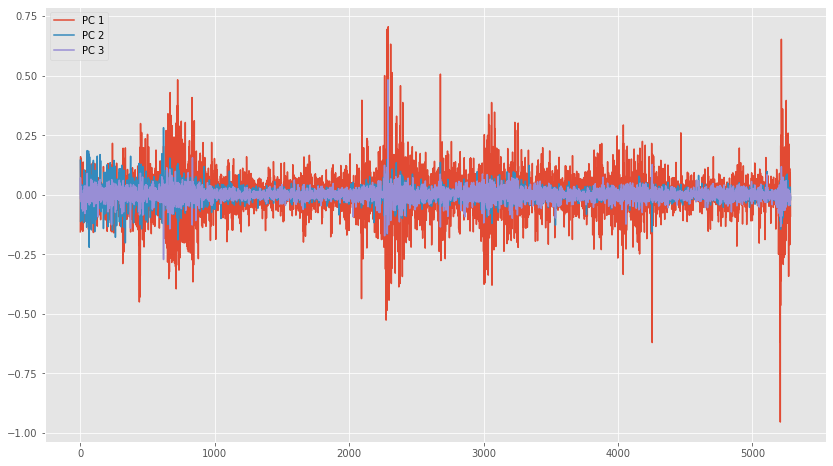

In [4]:
#Plot some PCs

import matplotlib
import matplotlib.pyplot       as plt
matplotlib.style.use('ggplot')

plt.figure( figsize = (14,8) )
plt.plot( PC[:,:3] )
plt.legend(['PC 1', 'PC 2', 'PC 3' ])

 

## Solution to B.3

In [5]:
#check variance explained is the same as when using python package sklearn
print((w) / np.sum(w))

[0.44724507 0.05160609 0.03402047 0.03184541 0.02873943 0.02633229
 0.02359294 0.0218684  0.0195499  0.01853672 0.01683293 0.01657301
 0.01469155 0.01418374 0.01401323 0.01330819 0.0126774  0.01211172
 0.01169037 0.01117605 0.01098664 0.01054926 0.0098863  0.0096925
 0.00938841 0.00891815 0.00844271 0.00812889 0.00790536 0.00785135
 0.00719826 0.00702434 0.00645814 0.00582735 0.00557825 0.0053998
 0.0052638  0.00521058 0.00507042 0.00462109 0.00423693 0.0030469
 0.00271966]


## Solution to B.4

In [6]:
from sklearn.decomposition import PCA 

pca_r_d = PCA().fit(r_d.iloc[:,0:r_d.shape[1]-1]) #exclude (1/N) portfolio
print(pca_r_d.explained_variance_ratio_)

[0.44724507 0.05160609 0.03402047 0.03184541 0.02873943 0.02633229
 0.02359294 0.0218684  0.0195499  0.01853672 0.01683293 0.01657301
 0.01469155 0.01418374 0.01401323 0.01330819 0.0126774  0.01211172
 0.01169037 0.01117605 0.01098664 0.01054926 0.0098863  0.0096925
 0.00938841 0.00891815 0.00844271 0.00812889 0.00790536 0.00785135
 0.00719826 0.00702434 0.00645814 0.00582735 0.00557825 0.0053998
 0.0052638  0.00521058 0.00507042 0.00462109 0.00423693 0.0030469
 0.00271966]


## Solution to C.1

In [7]:
import numpy                   as np
import pandas                  as pd





#create a Python class 'PCA'.
## contains a class-method: "get_EigenValeDecomp", "get_PCs", "plot_PCs", "Var_Explained",  
#
# Note: 'def' defines a function. The '__init__' function instantiates the class.

class PCA:
    
    def __init__(self, DataPanel):     #initialize the following class members
        self.X = DataPanel
        self.w = []
        self.v = []
        self.E = []
        self.Lambda = []
        self.PC = []
                
    def PerformEigenValueDecomposition(self): # w,v on X; sort w (and v) from large to small
        # Demean X
        X                = np.matrix(self.X)
        X_dm             = X - np.mean(X, axis = 0 )
    
    
        #EigenValueDecomposition(Sigma)
        Sigma            = np.cov(X_dm,rowvar=False) #( np.matmul(np.transpose(X_dm), X_dm) )  / X.shape[0]
        self.w, self.v   = np.linalg.eig( Sigma ) #eigenValues, eigenVectors
    
        #Ensure w and v are sorted in descending order
        idx              = self.w.argsort()[::-1]
        self.w                = self.w[idx]                 #eigenvalues are sorted from large to small
        self.v                = self.v[:,idx]               #first eigenvector corresponds to largest eigenvalues, and so on
        
         #compute E and Lambda from Sigma = E Lambda E'
        self.Lambda           = np.diag(self.w)
        self.E                = np.matrix(self.v)
        
         #compute PCs
        self.PC            = X_dm @ self.E  #np.matmul(X_dm, self.E)   
        
        
        
    def display_cumVarTable(self):
        print(np.cumsum(self.w)/np.sum(self.w))   
        
    
    def plotPC(self,threshold): #plot PC1 up to PC_threshold
        import matplotlib
        import matplotlib.pyplot       as plt
        matplotlib.style.use('ggplot')
       
        
        plt.figure( figsize = (14,8) )
        plt.plot(self.X.index, self.PC[:,:threshold] )
        plt.legend()
            

## Solution C.2

In [8]:
pca_ = PCA(r_d.iloc[:,0:r_d.shape[1]-1])

In [12]:
pca_.PerformEigenValueDecomposition()

In [13]:
pca_.display_cumVarTable()

[0.44724507 0.49885116 0.53287163 0.56471703 0.59345646 0.61978875
 0.64338169 0.66525009 0.68479999 0.7033367  0.72016964 0.73674264
 0.75143419 0.76561794 0.77963117 0.79293935 0.80561675 0.81772847
 0.82941884 0.84059489 0.85158153 0.86213079 0.87201709 0.88170959
 0.89109799 0.90001615 0.90845886 0.91658775 0.92449312 0.93234446
 0.93954273 0.94656707 0.95302521 0.95885256 0.96443081 0.96983061
 0.97509441 0.980305   0.98537541 0.9899965  0.99423343 0.99728034
 1.        ]


No handles with labels found to put in legend.


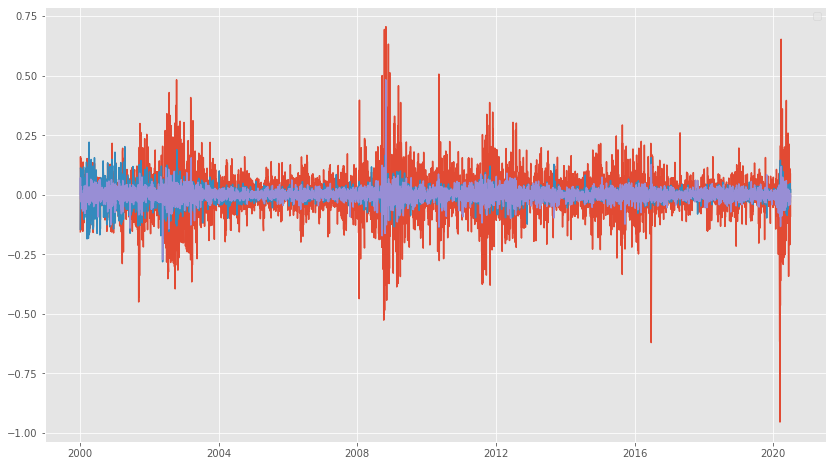

In [14]:
pca_.plotPC(3)